# Python for (open) Neuroscience

_Lecture 3.1_ - Introduction to Statistics and Machine learning in Pyhton

Luigi Petrucco

### Outlook

- This won't be a lecture on statistics! (I actually know very little)

 - We will see the most common modules for statistics that you can find in Python

### Descriptive statistics

#### Mean, median

In [1]:
import numpy as np

data = np.random.normal(0, 1, 1000)

print('Mean: {}'.format(np.mean(data)))
print('Median: {}'.format(np.median(data)))

Mean: 0.026121962607877275
Median: 0.0482791810065808


#### Standard deviation, variance

In [2]:
print(f'Standard deviation: {np.std(data)}')
print(f'Variance: {np.var(data)}')

Standard deviation: 0.9597498503317574
Variance: 0.9211197752118307


#### Percentiles

In [3]:
print(f' 95Percentile: {np.percentile(data, 95)}')

 95Percentile: 1.6041671230905725


## Statistical tests

The `scipy` module provides functions for pretty much any kind of classical statistics you might want to compute!

In [4]:
# In scipy we find many modules for scientific computing of all kinds.
# The module for statistics is stats:

import scipy.stats as stats

### One-sample tests

In [5]:
# One-sample t-test
data = np.random.normal(1, 1, 1000)

test_result = stats.ttest_1samp(data, 0)
test_result

TtestResult(statistic=30.984845258033832, pvalue=2.894137399784169e-148, df=999)

In [6]:
# One-sample Wilcoxon signed-rank test
stats.wilcoxon(data)

WilcoxonResult(statistic=41665.0, pvalue=2.1952857265887625e-115)

### Two-sample t-test

In [7]:
data2 = np.random.normal(0, 1, 1000)

stats.ttest_ind(data, data2)

TtestResult(statistic=21.579503243522122, pvalue=5.193663039326702e-93, df=1998.0)

### Two-sample Wilcoxon rank-sum test

In [8]:
#Two-sample Wilcoxon rank-sum test
stats.ranksums(data, data2)

RanksumsResult(statistic=19.674097770633747, pvalue=3.595183849827316e-86)

## Paired samples

### Paired t-test

In [9]:
stats.ttest_rel(data, data2)

TtestResult(statistic=22.535173275260817, pvalue=2.996778918705888e-91, df=999)

### Paired Wilcoxon signed-rank test

In [10]:
stats.wilcoxon(data, data2)

WilcoxonResult(statistic=76087.0, pvalue=4.998930422429944e-81)

## Normality tests

In [11]:
# Test normality of data
data = np.random.normal(0, 1, 1000)
stats.normaltest(data)

NormaltestResult(statistic=0.04014038959326531, pvalue=0.9801298708750376)

### QQ plots for normality tests

The visualization to look at normality is the quantile-quantile plot.
We can make QQ plots using `scipy.stats` and `matplotlib`:

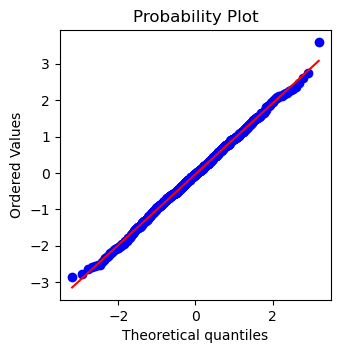

In [12]:
from matplotlib import pyplot as plt
# Here we pass to the `plot` argument the plotting library we want to use:
plt.figure(figsize=(3.5, 3.5))
stats.probplot(data, dist="norm", plot=plt)
plt.show()

### One-way ANOVA

In [13]:
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)
data3 = np.random.normal(-1, 1, 1000)
stats.f_oneway(data, data2, data3)

F_onewayResult(statistic=345.28270743708543, pvalue=1.1365647796690355e-135)

### Correlation

PearsonRResult(statistic=0.028898910023452493, pvalue=0.3612891126013292)

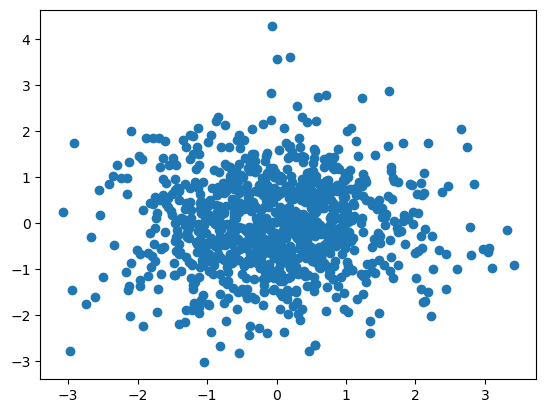

In [14]:
from matplotlib import pyplot as plt
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

PearsonRResult(statistic=0.691927496073383, pvalue=2.301667351277307e-143)

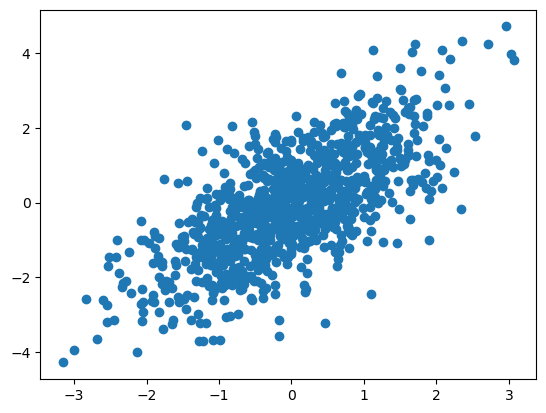

In [15]:
data = np.random.normal(0, 1, 1000)
data2 = data + np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

## Curve fitting

### Linear regression

The `scipy.optimize` module offers the `curve_fit()` function to fit a given function to a set of datapoints.

Example:

LinregressResult(slope=0.9961538784527793, intercept=-0.05349907710301648, rvalue=0.691927496073383, pvalue=2.3016673512770466e-143, stderr=0.032901667855906466, intercept_stderr=0.032640505032227)


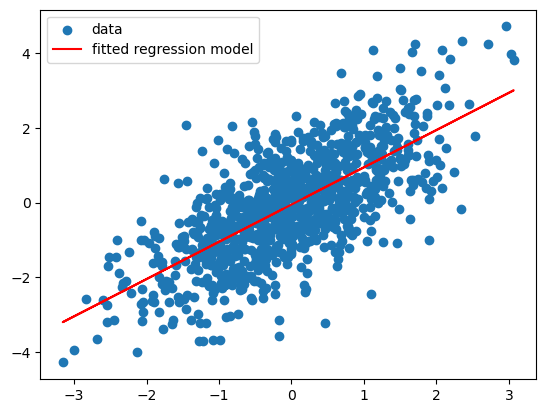

In [16]:
from scipy.stats import linregress

fitted_model = linregress(x=data, y=data2)
print(fitted_model)
plt.scatter(data, data2, label='data')
plt.plot(data, fitted_model.intercept + fitted_model.slope*data, color='r', label='fitted regression model')
plt.legend()
plt.show()

### Nonlinear regression

Similar fitting procedures are available for nonlinear data with the more general function  `curve_fit()`:

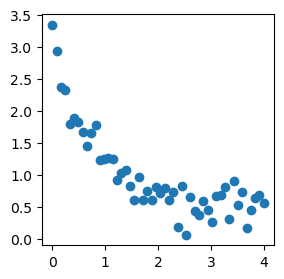

In [17]:
from scipy.optimize import curve_fit

# Generate data
x = np.linspace(0, 4, 50)
noise = 0.2 * np.random.normal(size=len(x))
ydata = 2.5 * np.exp(-1.3 * x) + 0.5 + noise

# plot the data
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')

In [21]:
# Define the function to fit:
def func_to_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

In [22]:
# Fit the data
popt, pcov = curve_fit(func_to_fit, x, ydata)

# retrieved parameters
popt

array([2.58885132, 1.33963464, 0.50309491])

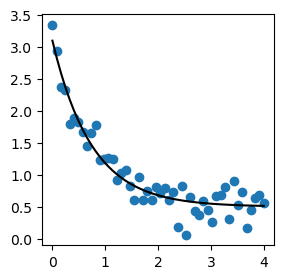

In [23]:
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')
plt.plot(x, func_to_fit(x, popt[0], popt[1], popt[2]), c="k", label='fit')

In [24]:
# The pcov returned value gives us estimates over the uncertainty of the parameters
# that were fit:
pcov

array([[ 0.01496265,  0.00623825, -0.00073702],
       [ 0.00623825,  0.01834856,  0.00509404],
       [-0.00073702,  0.00509404,  0.00272162]])

(Practicals 3.2.0)

## More advanced statistics using statsmodels

The `statsmodels` module provides a more complete set of statistical tools, including:
- Linear models
- Generalized linear models
- Multivariate statistics
- ...

**Disclaimer**

Python is generally considered less powerful than R when it comes to advanced statistical models. I do not know much statistics, so I take the experts' opinion on this point!

I've also never used `statsmodels`.

### Linear models

In [25]:
# From the statsmodels tutorial:
import statsmodels.api as sm  # requires pip/conda install statsmodels
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('Guerry', 'HistData').data
data = data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
data.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [26]:
model = smf.ols('Lottery ~ Literacy + Wealth + Region', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.07e-05
Time:                        16:23:59   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

# Machine learning: `scikit-learn`

`scikit-learn` is the library for machine learning pipelines. It includes functions/classes for: 
- data preprocessing (normalization, etc.)
- dataset splitting (iterations over train/test splits, etc.)
- dimensionality reduction
- clustering / (multi) linear regression
- More advanced methods: decision tree forests, support-vector machines...

In [27]:
# requires pip/conda install scikit-learn
from sklearn import preprocessing

## Data preprocessing

The most common data preprocessing tool is a scaler: an object that can be used to 
consistently scale data using consistent parameters.

In [28]:
import numpy as np 
X_train = np.array([[ 3.,   0.,   0.],
                    [ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [29]:
print("Data means (one per column): ", scaler.mean_)

Data means (one per column):  [1.5  0.   0.25]


In [30]:
print("Data std (one per column): ", scaler.var_)

Data std (one per column):  [1.25   0.5    1.1875]


In [31]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 1.34164079,  0.        , -0.22941573],
       [-0.4472136 , -1.41421356,  1.60591014],
       [ 0.4472136 ,  0.        , -0.22941573],
       [-1.34164079,  1.41421356, -1.14707867]])

There are also other scalers for [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) (`MinMaxScaler`), etc.

# Dimensionality reduction

### Principal component analysis

Principal component analysis is implemented in the same object-oriented fashon:

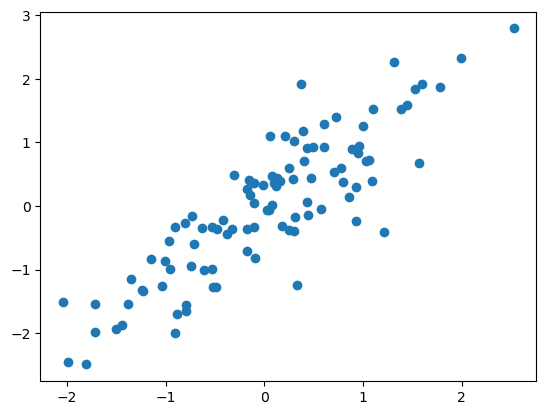

In [32]:
# A simple 2D dataset:
x = np.random.randn(100)
X = np.stack([x, x*1+np.random.randn(100)*0.5]).T

plt.figure()
plt.scatter(X[:, 0], X[:, 1])

In [33]:
np.std(X, 0)

array([0.93114011, 1.10942787])

To find principal components, we use the PCA class to create a PCA decomposition object:

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # initialize a pca decomposition object from PCA class

# Before PCA we always have to normalize our data;
X = preprocessing.StandardScaler().fit_transform(X)

pca.fit(X)  # fit it calling a method
print(pca.explained_variance_ratio_)

[0.93344306 0.06655694]


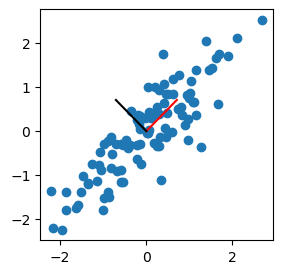

In [35]:
plt.figure(figsize=(3, 3)  )
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r')
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'k')

To visualize the data in the new PCA space:

(-3.4314545444062543,
 4.027374369279223,
 -1.2598007959890956,
 1.0711048237358707)

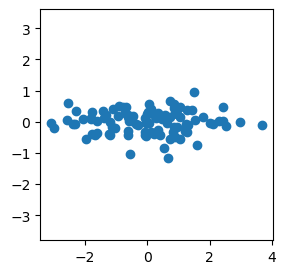

In [36]:
transformed = pca.transform(X)

plt.figure(figsize=(3, 3))
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.axis("equal")

## Data splitting with `scikit-learn`

There are smart ways of splitting data into training and test sets:

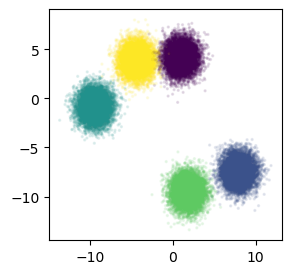

In [37]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50000, centers=5, n_features=5, random_state=3) # create an example dataset
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.1, s=2)
plt.show()

The good way of doing clustering, regression, etc. is to always fit the parameters on a fraction of the data, and test their goodness on the other to avoid overfitting.

We can do it using the `train_test_split()` function:

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.1,  # fraction for testing
                                                    stratify=y, 
                                                    random_state=50)

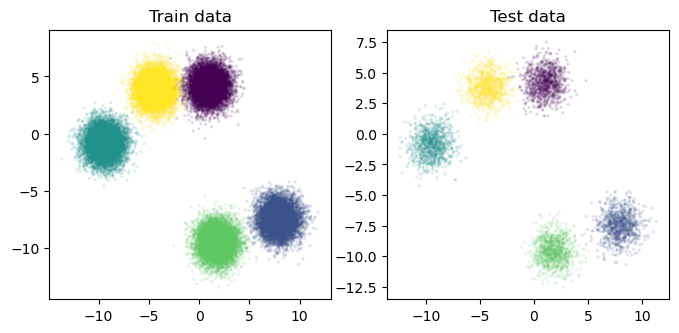

In [39]:
f, axs = plt.subplots(1, 2, figsize=(8, 3.5))
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, alpha=0.1, s=2)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.1, s=2)

axs[0].set_title("Train data")
axs[1].set_title("Test data")
plt.show()

There are also tools to directly loop over multiple splits of the data to perform multiple iterations of our clustering/regression procedure:



In [40]:
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [0, 2], [1, 2], [5, 2], [0, 1]])

kf = KFold(n_splits=4)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print("train data :", X[train_index, :], "test data:", X[test_index, :])

train data : [[1 2]
 [3 4]
 [0 2]
 [1 2]
 [5 2]
 [0 1]] test data: [[1 2]
 [3 4]]
train data : [[1 2]
 [3 4]
 [0 2]
 [1 2]
 [5 2]
 [0 1]] test data: [[1 2]
 [3 4]]
train data : [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [5 2]
 [0 1]] test data: [[0 2]
 [1 2]]
train data : [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [0 2]
 [1 2]] test data: [[5 2]
 [0 1]]


# Data clustering

In [41]:
import numpy as np

# Create clustered data
X, y = make_blobs(n_samples=50000, centers=4, cluster_std=2,
                  n_features=2, random_state=10)  # Create clustered data


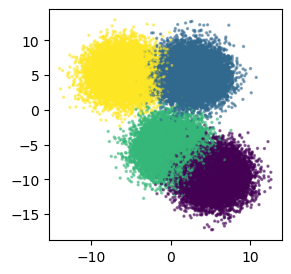

In [42]:
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s=2)

Here we implement K-Means clustering using the `KMeans` class from `sklearn.cluster`:

In [43]:
from sklearn.cluster import KMeans

# Split data in test and train:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=50)

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10, random_state=4)
kmeans.fit(X_train)  # fit the cluster classifier on train data

# Use the fit model to predict new data:
Y_predicted = kmeans.predict(X_test)

Text(0.5, 1.0, 'Predicted test clusters:')

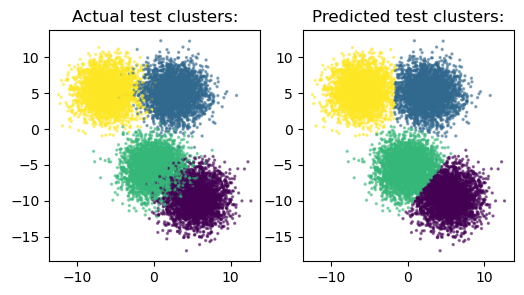

In [44]:
f, axs = plt.subplots(1,2,figsize=(6, 3))

axs[0].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.5, s=2)
axs[0].set_title("Actual test clusters:")

axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted, alpha=0.5, s=2)
axs[1].set_title("Predicted test clusters:")

# Measuring accuracy

`sklearn` offers also many tools to measure the accuracy of our regression and clustering.
In this case, a suitable visualization of the goodness of our method is the
confusion matrix, that shows how many data points have been clustered wrongly

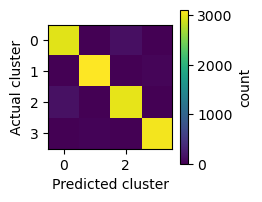

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_predicted)

f, ax = plt.subplots(figsize=(2,2))
im = ax.imshow(conf_matrix)
ax.set(xlabel="Predicted cluster", ylabel="Actual cluster")
plt.colorbar(im, label="count")

(Note: sometimes we might have to match cluster IDs before computing the confusion matrix) **(MATTEO: I think this is worth an explanation)**

(Practicals 3.2.1)